# CHAPTER 4

# Section 1
Learning how to represent common data formats into usable tensors for Deep Learning models.

In [1]:
import imageio
import torch
from matplotlib import pyplot as plt

In [2]:
# imageio can be used to easily read in PNG and JPG images into tensors
img = imageio.imread('/Users/ramanshsharma/Downloads/goodimageofme.jpg')
img.shape

(2028, 1321, 3)

In [3]:
type(img)

imageio.core.util.Array

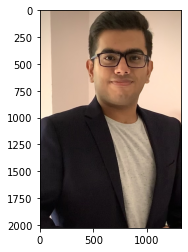

In [4]:
plt.imshow(img)

In [5]:
arr = torch.from_numpy(img)
arr.shape # H x W x C

torch.Size([2028, 1321, 3])

In [6]:
arr = arr.permute(2, 0, 1)
arr.shape # C x H x W

torch.Size([3, 2028, 1321])

## example thing

In [7]:
arr = arr.float()
arr /= 255.
arr # normalized

tensor([[[0.7961, 0.7961, 0.7961,  ..., 0.7725, 0.7725, 0.7725],
         [0.7961, 0.7961, 0.7961,  ..., 0.7725, 0.7725, 0.7686],
         [0.7961, 0.7961, 0.7961,  ..., 0.7725, 0.7725, 0.7765],
         ...,
         [0.0902, 0.0941, 0.0980,  ..., 0.0588, 0.0588, 0.0588],
         [0.0863, 0.0902, 0.0941,  ..., 0.0588, 0.0588, 0.0588],
         [0.0863, 0.0902, 0.0941,  ..., 0.0588, 0.0588, 0.0588]],

        [[0.7255, 0.7255, 0.7255,  ..., 0.6706, 0.6706, 0.6706],
         [0.7255, 0.7255, 0.7255,  ..., 0.6706, 0.6706, 0.6667],
         [0.7255, 0.7255, 0.7255,  ..., 0.6706, 0.6706, 0.6745],
         ...,
         [0.0706, 0.0745, 0.0784,  ..., 0.0431, 0.0431, 0.0431],
         [0.0667, 0.0706, 0.0745,  ..., 0.0431, 0.0431, 0.0431],
         [0.0667, 0.0706, 0.0745,  ..., 0.0431, 0.0431, 0.0431]],

        [[0.6392, 0.6392, 0.6392,  ..., 0.5725, 0.5725, 0.5804],
         [0.6392, 0.6392, 0.6392,  ..., 0.5725, 0.5725, 0.5765],
         [0.6392, 0.6392, 0.6392,  ..., 0.5725, 0.5804, 0.

In [8]:
# practicing loading multiple images from disk

In [9]:
import os
data_dir = "../Chapter_4/imgs/"
filenames = [name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.png']

In [10]:
batch = torch.zeros(3, 3, 1800, 2880, dtype=torch.uint8) # most common bit size for images is uint8

In [11]:
batch.size()

torch.Size([3, 3, 1800, 2880])

In [15]:
for i, img in enumerate(filenames):
    read = imageio.imread(os.path.join(data_dir, img))
    arr = torch.from_numpy(read)
    arr = arr.permute(2, 0, 1) # reshaping as earlier to C x H x W
    # some images have more than 3 channels. So to remove other than 3 channels
    arr = arr[:3].to(torch.uint8)
    batch[i] = arr

In [16]:
# preprocessing that is requires in neural networks
batch = batch.float()
print(batch.dtype)
# either we can do
# batch /= 255.0 for image normalization
# or

for c in range(batch.shape[1]): # over all channels
    mean = torch.mean(batch[:, c]) # mean over all examples, over channel c
    std = torch.std(batch[:, c]) # std over all examples, over channel c
    batch[:, c] = (batch[:, c] - mean) / std


torch.float32


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


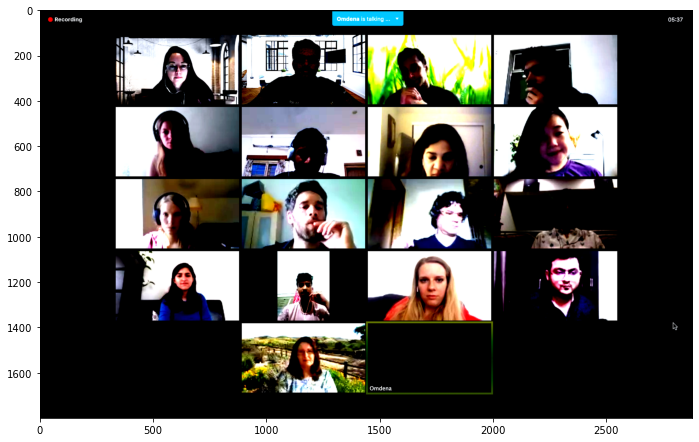

In [14]:
fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)
plt.imshow(batch[2].permute(1, 2, 0))

In [18]:
# practicing one-hot vectors

In [19]:
a = torch.tensor([0, 1, 2, 4, 4, 5, 6, 7, 8, 9], dtype=torch.long)

In [20]:
a = a.long()
print(a.dtype)
a.shape

torch.int64


torch.Size([10])

In [21]:
onehotvec = torch.zeros(a.shape[0], 13)
onehotvec.shape

torch.Size([10, 13])

In [22]:
a.unsqueeze(1)

tensor([[0],
        [1],
        [2],
        [4],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]])

In [23]:
onehotvec.scatter_(1, a.unsqueeze(1), 1)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

## Exploring advanced boolean indexing

In [17]:
a = torch.rand(1, 1000)
a

tensor([[5.6054e-01, 1.4051e-01, 8.1546e-01, 9.4455e-01, 2.7048e-01, 7.5678e-01,
         9.3981e-01, 5.9794e-01, 2.9651e-01, 7.3089e-01, 7.3653e-01, 9.7600e-01,
         7.0633e-01, 2.9035e-01, 7.9115e-01, 2.0140e-02, 5.6599e-01, 1.0674e-01,
         3.8042e-01, 4.5796e-01, 9.7099e-01, 6.6924e-01, 3.2328e-01, 5.2200e-01,
         8.4602e-01, 2.6918e-01, 4.8912e-01, 4.0812e-01, 8.6657e-02, 9.3390e-01,
         7.7606e-01, 9.8922e-01, 2.0126e-01, 8.6031e-01, 2.3913e-01, 9.2392e-01,
         9.1428e-01, 2.9629e-01, 6.9328e-01, 3.3540e-01, 4.7245e-01, 1.2511e-01,
         7.4631e-01, 5.4321e-01, 2.2893e-01, 9.5934e-01, 7.4020e-01, 6.9130e-01,
         9.7510e-03, 7.6085e-01, 6.5031e-02, 9.2151e-01, 6.7829e-01, 7.4872e-01,
         9.7061e-01, 4.9625e-01, 8.1111e-01, 4.8151e-01, 6.5025e-01, 2.9714e-01,
         3.4945e-01, 2.9627e-01, 2.6289e-01, 4.1441e-01, 6.3080e-01, 5.0447e-01,
         3.1537e-01, 1.9564e-01, 8.8800e-01, 9.7624e-01, 1.6788e-01, 5.9736e-01,
         3.1508e-01, 5.7794e

In [18]:
a = a < 0.5
a.shape, a.dtype, torch.sum(a, 1)

(torch.Size([1, 1000]), torch.bool, tensor([492]))

In [26]:
torch.cat([torch.tensor([1, 2, 3, 4]), torch.tensor([12, 13, 45, 56])], axis=0)

tensor([ 1,  2,  3,  4, 12, 13, 45, 56])